In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Flower Pollination Algorithm

In [2]:
import torch
from torch import normal, randint, rand, multinomial
from math import pi, cos, sin, gamma
from tqdm import tqdm

<IPython.core.display.Javascript object>

In [3]:
from obj_f import ackley_f, weierstrass_f

<IPython.core.display.Javascript object>

In [118]:
# %load obj_f

import torch
from math import pi, cos, sin, gamma


def ackley_f(x):
    # x = x.cuda()
    if len(x.shape) == 1:
        x = x.unsqueeze(1)

    lhs = 20 * torch.exp((-0.2) * torch.sqrt((x ** 2).mean()))
    rhs = torch.cos(2 * pi * x).mean().exp()
    result = -1 * (lhs + rhs) + 20 + torch.exp(torch.Tensor([1]))  # .cuda()

    return result


def weierstrass_f(x, a=0.5, b=3, kmax=20):
    # x = x.cuda()
    x = (x * 0.5) / 100
    if len(x.shape) == 1:
        x = x.unsqueeze(1)

    D = x.shape[0]

    lhs = 0
    rhs = 0
    for k in range(kmax):
        lhs += torch.sum((a ** k) * torch.cos(2 * pi * (b ** k) * (x + 0.5)))
        rhs += (a ** k) * torch.cos(torch.Tensor([pi * (b ** k)]))
    result = lhs - D * rhs + 600
    return result

<IPython.core.display.Javascript object>

In [4]:
from random import choices

<IPython.core.display.Javascript object>

In [5]:
def argmin(lst):
    return min(range(len(lst)), key=lst.__getitem__)

<IPython.core.display.Javascript object>

In [105]:
class FPA(object):
    def __init__(
        self,
        function,
        pop_size=50,
        low_bound=-20,
        up_bound=20,
        dimension=10,
        p=0.8,
        alpha=0.9,
        **kwargs
    ):

        self.pop_size = pop_size
        self.low_bound = low_bound
        self.up_bound = up_bound
        self.dimension = dimension
        self.obj_f = function
        self.p = p
        self.alpha = alpha

    def forward(self, iteration_time, **kwargs):
        init_points_list = self.random_generate_sampe(size=self.pop_size)
        points_list = init_points_list[:]

        init_function_values_list = [
            self.obj_f(sub_point, **kwargs) for sub_point in init_points_list
        ]
        function_values = init_function_values_list[:]

        global_best_value_each_step = []
        global_best_point_each_step = []

        global_best_index = argmin(function_values)
        global_best_value_each_step.append(function_values[global_best_index])
        global_best_point_each_step.append(points_list[global_best_index])

        for t in tqdm(range(iteration_time)):
            for i in range(self.pop_size):
                if rand(1) < self.p:
                    new_point = points_list[i] + self.levy_fly() * (
                        global_best_point_each_step[-1] - points_list[i]
                    )
                else:
                    rand_index = choices(range(self.pop_size), k=2)
                    new_point = points_list[i] + rand(self.dimension, 1) * (
                        points_list[rand_index[0]] - points_list[rand_index[1]]
                    )

                temp_function_value = self.obj_f(new_point, **kwargs)
                if temp_function_value < function_values[i]:
                    function_values[i] = temp_function_value
                    points_list[i] = new_point

            global_best_index = argmin(function_values)
            global_best_value_each_step.append(function_values[global_best_index])
            global_best_point_each_step.append(points_list[global_best_index])

        return global_best_value_each_step, global_best_point_each_step

    def levy_fly(
        self,
    ):
        beta = 1.5
        sigma_u = (
            (gamma(1 + beta) * sin(0.5 * pi * beta))
            / (gamma(0.5 * (1 + beta)) * beta * (2 ** (0.5 * (beta - 1))))
        ) ** (1 / beta)
        sigma_v = 1
        step_part1 = normal(0, sigma_u, (self.dimension, 1))
        step_part2 = normal(0, sigma_v, (self.dimension, 1))
        step = step_part1 / (torch.abs(step_part2) ** (1 / beta))
        return self.alpha * step

    def random_generate_sampe(self, size, *arg):
        init_points = (rand(self.dimension, size) - 0.5) * 40
        init_points = list(torch.split(init_points, split_size_or_sections=1, dim=1))
        return init_points

<IPython.core.display.Javascript object>

In [106]:
fpa_ackley_10dim = FPA(function=ackley_f)
fpa_ackley_20dim = FPA(function=ackley_f, dimension=20)

<IPython.core.display.Javascript object>

In [107]:
all_values_list_ackley_10dim = []
for i in range(20):
    values, points = fpa_ackley_10dim.forward(300)
    all_values_list_ackley_10dim.append(torch.Tensor(values))

100%|██████████| 300/300 [00:06<00:00, 49.87it/s]


<IPython.core.display.Javascript object>

In [108]:
all_values_list_ackley_20dim = []
for i in range(20):
    values, points = fpa_ackley_20dim.forward(1300)
    all_values_list_ackley_20dim.append(torch.Tensor(values))

100%|██████████| 1300/1300 [00:29<00:00, 44.67it/s]


<IPython.core.display.Javascript object>

In [181]:
fpa_weierstrass_10dim = FPA(function=weierstrass_f)
fpa_weierstrass_20dim = FPA(function=weierstrass_f, dimension=20, p=0.5, alpha=0.6)

<IPython.core.display.Javascript object>

In [182]:
all_values_list_weierstrass_10dim = []
for i in range(20):
    values, points = fpa_weierstrass_10dim.forward(150)
    all_values_list_weierstrass_10dim.append(torch.Tensor(values))

100%|██████████| 150/150 [00:22<00:00,  6.80it/s]


<IPython.core.display.Javascript object>

In [183]:
all_values_list_weierstrass_20dim = []
for i in range(20):
    values, points = fpa_weierstrass_20dim.forward(600)
    all_values_list_weierstrass_20dim.append(torch.Tensor(values))

100%|██████████| 600/600 [01:28<00:00,  6.75it/s]


<IPython.core.display.Javascript object>

# Visualization

In [38]:
import numpy as np

<IPython.core.display.Javascript object>

In [14]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

## Ackley function

In [112]:
all_values_tensor_ackley_10dim = torch.stack(all_values_list_ackley_10dim).numpy()
max_line_10d = all_values_tensor_ackley_10dim.max(axis=0)
mean_line_10d = all_values_tensor_ackley_10dim.mean(axis=0)
min_line_10d = all_values_tensor_ackley_10dim.min(axis=0)

all_values_tensor_ackley_20dim = torch.stack(all_values_list_ackley_20dim).numpy()
max_line_20d = all_values_tensor_ackley_20dim.max(axis=0)
mean_line_20d = all_values_tensor_ackley_20dim.mean(axis=0)
min_line_20d = all_values_tensor_ackley_20dim.min(axis=0)

<IPython.core.display.Javascript object>

In [116]:
[
    mean_line_10d[-1],
    all_values_tensor_ackley_10dim.std(axis=0)[-1],
    mean_line_20d[-1],
    all_values_tensor_ackley_20dim.std(axis=0)[-1],
]

[0.052844334, 0.036194965, 0.114312746, 0.05666527]

<IPython.core.display.Javascript object>

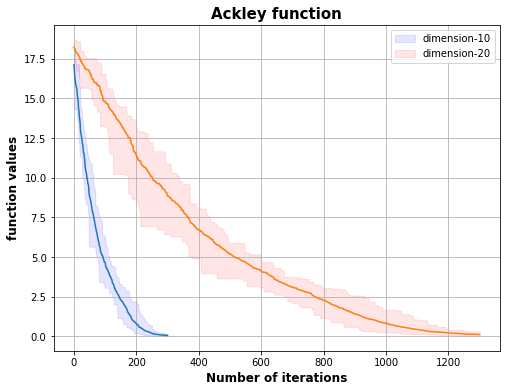

<IPython.core.display.Javascript object>

In [113]:
plt.figure(figsize=(8, 6))
plt.plot(range(301), mean_line_10d)
plt.fill_between(
    range(301), min_line_10d, max_line_10d, color="b", alpha=0.1, label="dimension-10"
)

plt.plot(range(1301), mean_line_20d)
plt.fill_between(
    range(1301), min_line_20d, max_line_20d, color="r", alpha=0.1, label="dimension-20"
)
plt.xlabel("Number of iterations", weight="bold", size=12)
plt.ylabel("function values", weight="bold", size=12)
plt.title("Ackley function", weight="bold", size=15)
plt.grid(True)
plt.legend()
plt.show()

## Weierstrass function

In [185]:
all_values_tensor_weierstrass_10dim = torch.stack(
    all_values_list_weierstrass_10dim
).numpy()
max_line_weierstrass_10d = all_values_tensor_weierstrass_10dim.max(axis=0)
mean_line_weierstrass_10d = all_values_tensor_weierstrass_10dim.mean(axis=0)
min_line_weierstrass_10d = all_values_tensor_weierstrass_10dim.min(axis=0)

all_values_tensor_weierstrass_20dim = torch.stack(
    all_values_list_weierstrass_20dim
).numpy()
max_line_weierstrass_20d = all_values_tensor_weierstrass_20dim.max(axis=0)
mean_line_weierstrass_20d = all_values_tensor_weierstrass_20dim.mean(axis=0)
min_line_weierstrass_20d = all_values_tensor_weierstrass_20dim.min(axis=0)

<IPython.core.display.Javascript object>

In [187]:
[
    max_line_weierstrass_10d[-1],
    all_values_tensor_weierstrass_10dim.std(axis=0)[-1],
    max_line_weierstrass_20d[-1],
    all_values_tensor_weierstrass_20dim.std(axis=0)[-1],
]

[602.06573, 0.37300327, 605.98755, 1.600584]

<IPython.core.display.Javascript object>

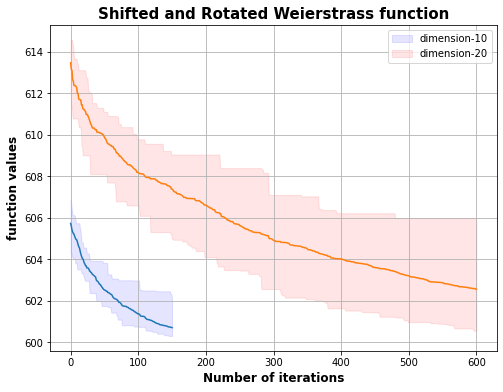

<IPython.core.display.Javascript object>

In [186]:
plt.figure(figsize=(8, 6))
plt.plot(range(151), mean_line_weierstrass_10d)
plt.fill_between(
    range(151),
    min_line_weierstrass_10d,
    max_line_weierstrass_10d,
    color="b",
    alpha=0.1,
    label="dimension-10",
)

plt.plot(range(601), mean_line_weierstrass_20d)
plt.fill_between(
    range(601),
    min_line_weierstrass_20d,
    max_line_weierstrass_20d,
    color="r",
    alpha=0.1,
    label="dimension-20",
)
plt.xlabel("Number of iterations", weight="bold", size=12)
plt.ylabel("function values", weight="bold", size=12)
plt.title("Shifted and Rotated Weierstrass function", weight="bold", size=15)
plt.grid(True)
plt.legend()
plt.show()